In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
hotel = pd.read_csv('gdrive/My Drive/hotel_bookings.csv')

In [ ]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Предобработка данных

In [ ]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
replacement_data = {"children": 0.0,"country": "Unknown", "agent": 0, "company": 0}
hotel_data = hotel.fillna(replacement_data)

In [ ]:
hotel_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
hotel_data['meal'].replace('Undefined', 'SC', inplace=True)

In [ ]:
hotel_data_zero_index = hotel_data[hotel_data['adults']+hotel_data['children']+hotel_data['babies']==0].index

In [ ]:
hotel_data.drop(index = hotel_data_zero_index, inplace = True)

In [ ]:
hotel_data[hotel_data['adults']+hotel_data['children']+hotel_data['babies']==0].index

Int64Index([], dtype='int64')

In [ ]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_data.shape

(119210, 32)

## Вопрос 1
Из какой страны прибывает наибольшее количество гостей (по данным обоих отелей суммарно)?

Дайте ответ названием страны из трех больших букв, также, как указано в данных

In [ ]:
hotel_data[hotel_data["is_canceled"] == 0]["country"].value_counts() #Ответ: PRT

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 166, dtype: int64

## Вопрос 2
Какая цена за одну ночь в каждом из отелей?

Ответ необходимо дать вне зависимости от типа номера, включенного питания. Также обратите внимание, что платящими пользователями мы считаем только взрослых и детей, младенцев необходимо исключить из расчета.

Ответ необходимо дать в формате в одну строку: Resort Hotel: 00.00, City Hotel: 00.00
— цену необходимо указать с точностью до двух знаков после запятой
— разделение долей может быть через точку или запятую
— наименования отелей в указанном формате, двоеточие и запятая обязательны для автоматического расчета ответа 

In [ ]:
resort_hotel = hotel_data[(hotel_data['hotel'] == 'Resort Hotel') & (hotel_data['is_canceled'] == 0)]
city_hotel = hotel_data[(hotel_data['hotel'] == 'City Hotel') & (hotel_data['is_canceled'] == 0)]

In [ ]:
resort_hotel['adr_per_person'] = resort_hotel['adr']/(resort_hotel['adults']+resort_hotel['children'])
city_hotel['adr_per_person'] = city_hotel['adr']/(city_hotel['adults']+city_hotel['children'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("""Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(resort_hotel['adr_per_person'].mean(), city_hotel['adr_per_person'].mean()))

Resort hotel: 47.49 € per night and person.
City hotel: 59.27 € per night and person.


## Вопрос 3
В какой сезон в обоих отелях меньше всего посетителей?

Необходимо дать текстовый ответ по примеру (начиная со строчной буквы): весна, зима, лето или осень

In [ ]:
resort_hotel_guest_data = resort_hotel.groupby('arrival_date_month')['hotel'].count()
resort_hotel_guest_data

arrival_date_month
April        2550
August       3257
December     2014
February     2308
January      1866
July         3137
June         2037
March        2571
May          2535
November     1975
October      2575
September    2102
Name: hotel, dtype: int64

In [ ]:
resort_guest_monthly = pd.DataFrame({'month': list(resort_hotel_guest_data.index),
                    'hotel': "Resort Hotel", 
                    'guests': list(resort_hotel_guest_data.values)})

In [ ]:
city_hotel_guest_data = city_hotel.groupby('arrival_date_month')['hotel'].count()
city_hotel_guest_data

arrival_date_month
April        4010
August       5367
December     2377
February     3051
January      2249
July         4770
June         4358
March        4049
May          4568
November     2676
October      4326
September    4283
Name: hotel, dtype: int64

In [ ]:
city_guest_monthly = pd.DataFrame({'month': list(city_hotel_guest_data.index),
                    'hotel': "City Hotel", 
                    'guests': list(city_hotel_guest_data.values)})

In [ ]:
hotel_data_full = pd.concat([resort_guest_monthly,city_guest_monthly], ignore_index=True)

In [ ]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

In [ ]:
hotel_data_full['month'] = pd.Categorical(hotel_data_full['month'], categories=months, ordered=True)

In [ ]:
hotel_data_full.loc[(hotel_data_full['month'] == 'July') | (hotel_data_full['month'] == 'August'),'guests'] /= 3
hotel_data_full.loc[~((hotel_data_full["month"] == 'July') | (hotel_data_full['month'] == 'August')),'guests'] /= 2

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

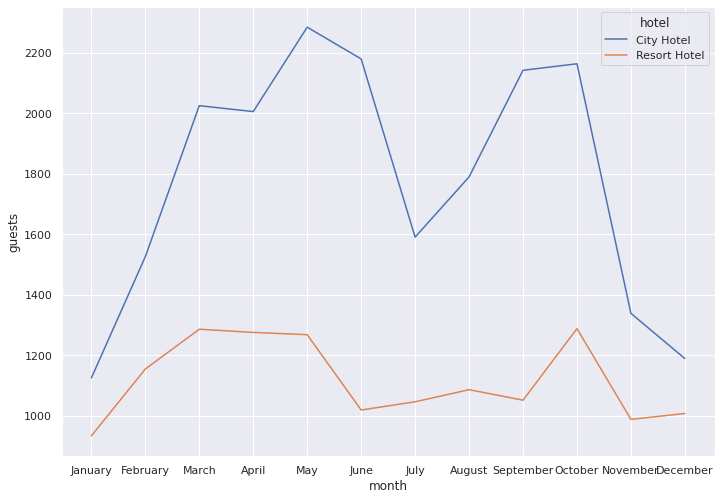

In [ ]:
sns.lineplot(x = "month", y="guests", hue="hotel", data=hotel_data_full, 
             hue_order = ["City Hotel", "Resort Hotel"])

In [ ]:
#Ответ: зима

## Вопрос 4
Сколько ночей максимум остаются посетители в отеле Resort Hotel?

## Вопрос 5
Сколько ночей максимум остаются посетители в отеле City Hotel?

In [ ]:
resort_hotel["total_nights"] = resort_hotel["stays_in_weekend_nights"] + resort_hotel["stays_in_week_nights"]
city_hotel["total_nights"] = city_hotel["stays_in_weekend_nights"] + city_hotel["stays_in_week_nights"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
resort_hotel["total_nights"].max()

69

In [ ]:
city_hotel["total_nights"].max()

48

## Вопрос 6
Какой процент бронирований происходит online? (Online TA).

Ответ необходимо дать с точностью до одного знака.

In [ ]:
hotel_data['market_segment'].value_counts(normalize=True)*100

Online TA        47.318178
Offline TA/TO    20.285211
Groups           16.601795
Direct           10.554484
Corporate         4.430836
Complementary     0.610687
Aviation          0.197131
Undefined         0.001678
Name: market_segment, dtype: float64

In [ ]:
#Ответ: 47.3%

## Вопрос 7
Какой процент отмен бронирований в отеле Resort Hotel?

Ответ необходимо дать целым числом.

In [ ]:
hotel_data[hotel_data["hotel"] == "Resort Hotel"]["is_canceled"].sum()/hotel_data[hotel_data["hotel"] == "Resort Hotel"].shape[0] * 100

27.767373336329815

In [ ]:
#Ответ: 28%

## Вопрос 8
В какой сезон самое большое количество отмен в Resort Hotel?

Необходимо дать текстовый ответ: весна, зима, лето или осень

In [ ]:
hotel_data[(hotel_data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum().sort_values(ascending=False)

arrival_date_month
August       1637
July         1436
April        1059
May          1024
June         1007
September    1006
October       978
February      794
March         763
December      631
November      460
January       325
Name: is_canceled, dtype: int64

In [ ]:
#Ответ: лето

## Вопрос 9
В какой месяц было самое большое количество гостей в City Hotel?

Название месяца на русском языке со строчной буквы

In [ ]:
#Ответ: май

##Вопрос 10
Какой процент бронирований с типом питания BB (Bed&Breakfast) был сделан в City Hotel за все время?

Ответ необходимо дать целым числом.

In [ ]:
hotel_data.groupby(['hotel','meal']).size()

hotel         meal
City Hotel    BB      62233
              FB         44
              HB       6412
              SC      10474
Resort Hotel  BB      30003
              FB        754
              HB       8046
              SC       1244
dtype: int64

In [ ]:
hotel_data[hotel_data['hotel'] == 'City Hotel']['meal'].value_counts(normalize=True)*100

BB    78.613746
SC    13.230929
HB     8.099744
FB     0.055582
Name: meal, dtype: float64

![median](https://cf.ppt-online.org/files/slide/m/MjDGO89vlKsWEBZPzVCouJxTUghtAHn7cyfN6S/slide-13.jpg)

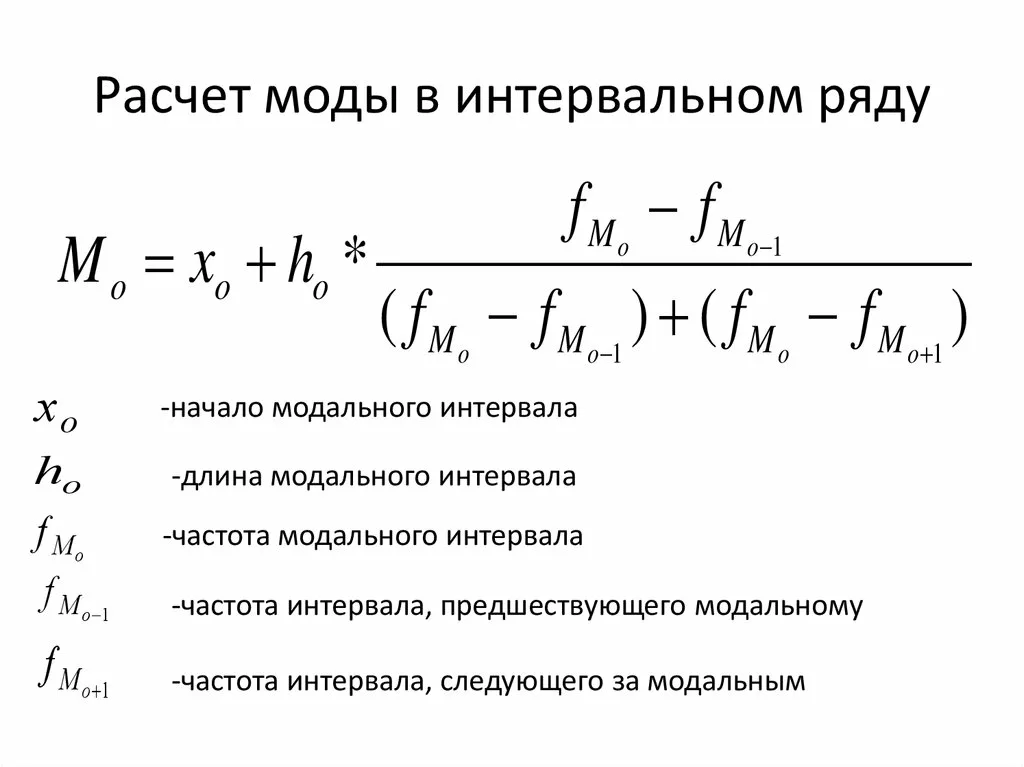